# Deliverable 3: Project Report
#### Group 3 - Aden Chan, Kashie Ugoji, Linda Han, Sungha Choi
--------------

## Introduction

#### Does the average final grade of high school students who do extracurricular activities differ from those who do not?

Every year there are graduating students from middle school, ready to be a part of the incoming batch of freshmen for high school. One of the biggest challenges students might face in highschool is the increase in not only the difficulty, but the variety of courses available. Many students in middle school partake in various extracurricular activities, such as sport teams or various clubs. With studies saying that engaging in too many extracurriculars can lead to worse academic performance (Wilson 2009), some parents will have their children fully drop their extracurriculars in highschool to focus more on their academic performance. However, does this actually make a difference? The question we are trying to solve is if there is a difference between the average grades for students who partake in extracurriculars, and those who do not. To do this, we will be looking at a dataset which contains the **final Math grade scores** for students belonging to two high schools in Portugal. We will then calculate the **mean** score of the students who are partaking in extracurriculars and then those who are not. From that information we will observe if there is a difference between these values and how significant it may be. One of the assumptions we will be making for this study will be that this dataset for students in Portugual is representative of high school students around the world. Another assumption will be that using Math scores is a good representation of overall academic performance and this can be backed through various studies (Duncan et al. 2007). By making these assumptions we can then generalize our findings. 

<img src="https://media.istockphoto.com/id/1307457391/photo/happy-black-student-raising-arm-to-answer-question-while-attending-class-with-her-university.jpg?s=612x612&w=0&k=20&c=iZaZFyC-WqlqSQc4elqUNPTxLvWPe8P5Tb_YdZnrI9Q="></img>

<i>Image from iStock by Getty Images</i>

## Methods: Plan

The choice of data from the Portuguese schools is directly relevant to the research question and the dataset contains neccesary features to analyze student achivement. Using hypothesis testing and confidence intervals, this report ensures that the findings are robust and not reliant on a single method. This reduces the risk of drawing incorrect conclusions. The analysis process is fully documented and open-access via the web, facilitating reproducibility. 

While the generated plots and point estimates in the initial stage offer valuable preliminary observations, they inherently lack statistical significance since they do not tell us the cause and effect, neither do they adequately disprove that the results obtained were not due to sampling variation. Hypothesis testing and confidence intervals provide quantitative measures of reliability and validity offering a more comprehensive and statistically grounded evaluation of research questions.

We plan to address these deficiencies by conducting a statistical analysis comparing the difference in means to determine if the results hold any significance.

**Hypothesis Testing.** We plan to use hypothesis testing for a difference in means with a confidence level of 95% and a significance level of 5%. Let $\bar{x}_1$ represent the mean academic score of students participating in regular extracurricular activities and $\bar{x}_2$ represent the mean academic score of students who do not participate in regular extracurricular activities. Our hypothesis test is as follows:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0$$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

This will be accomplished via bootstrapping, which will estimate the difference in population means, as using asymptotic methods to accomplish this is not feasible for a population of this size.

**Confidence Interval.** Should the null hypothesis be rejected, a confidence interval will be calculated to provide a range of plausible values for the true value of the difference in population means. This will be calculated with a level of 95% using the formula:

$$CI = (\bar{x}_1 - \bar{x}_2) ± (z^* * \sigma_M)$$

where $z^*$ is the critical value associated with the chosen confidence level, and $\sigma_M$ is the standard error of the difference in means. Should the null hypothesis not be rejected, a confidence interval would not need to be calculated as we are unable to determine that the difference in population means obtained were not due to the chance, thus providing a plausible range for the difference in population means would not be useful.

**Expected Findings.** Based on our preliminary analysis, we anticipate that the data does not support a significant impact of extracurricular activities on students' academic performance and differences in academic achievement between groups may be due to sampling variation. Should our predicted findings be confirmed through statistical analysis, it could ease parental concerns about enrolling their children in extracurriculars, allowing these children to reap the benefits of extracurricular activities. Studies have shown that teens who participate in extracurricular activities show better mental health, social skills and interpersonal skills (Oberle et al., 2020). This leads to further questions about what factors influence students' academic performance and we believe separate analysis of the other social factors recorded in this dataset can reveal potential factors, such as household income, parental relationship, access to outside academic support, and more.

## Results

#### 1. Importing libraries

To start doing exploratory data analysis, we first need to load in all the necessary libraries.

In [1]:
# Import tidyverse library
library(tidyverse)

# For the infer workflow
library(infer)

# For the asympotic test
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### 2. Importing dataset

The dataset we are interested in is "student-mat.csv", and it contains demographic, family, personal attributes, and academic performance information about **students in math classes from two Portuguese high schools** (Cortez, 2014).

Below, we illustrate the process of unzipping and extracting the dataset from a URL. The resulting dataset will be loaded into an object called `students`.

In [2]:
# Downloads the zipfile containing the dataset if it doesn't already exist 
# and saves it to the current working directory as "dataset-zip"
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
destfile <- "./dataset-zip" 

if (!file.exists(destfile)) {
    download.file(url, destfile)
    
    # Unzips the zipfile and extracts the dataset to current working directory
    unzip(destfile, files = "student.zip") %>% unzip(files = "student-mat.csv")
}

# Read the dataset and name it `students`
students <- read_delim("./student-mat.csv", delim = ";")
head(students)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


#### 3. Wrangling the dataset

Now that the dataset has been successfully loaded, we will wrangle it to the desired format for our project.

Grades in Portugal are distributed on a scale of 0-20 with 18-20 being excellent in international standards (Universidade Portucalense, 2022) . According to the description provided in the documentation, the column `G3` in the dataset represents the students' final grade:

> G3 - final grade (numeric: from 0 to 20, output target)

To make `G3` more readable, we mutate its name to `final_grade`. We then select the two columns relevant to our inferential question - `activities` and the newly mutated column `final_grade`.

In [3]:
# Wrangle the dataset
students_sample <- students %>%
    mutate(final_grade = G3) %>%
    select(activities, final_grade)

head(students_sample)

activities,final_grade
<chr>,<dbl>
no,6
no,6
no,10
yes,15
no,10
yes,15


#### 4. Gaining insight about the dataset

Once again, we are interested in finding the **average grade of students who do extracurricular activities** and the **average grade of those who do not**. 

First, we try to gain some initial insight about the dataset.

In [4]:
# Count the total number of students
nrow(students)

[1] 395

In [5]:
# Ensure there are no NA values
nrow(students_sample %>% filter(is.na(final_grade) | is.na(activities)))

[1] 0

In [6]:
# Count the number and proportion of students in each category
count(students, activities) %>%
mutate(prop = n / nrow(students))

activities,n,prop
<chr>,<int>,<dbl>
no,194,0.4911392
yes,201,0.5088608


We do this in order to gain better perspective for the upcoming analysis. By looking at the proportions of the groups, we get more context for how accurate our statistics might be as an extremely small proportion may produce an unreliable statistic due to outliers. From above, we examine that there are a total of 395 students in the dataset, and out of those students **49%** of them **do not** do extracurriculars while the other **51%** of them **do**.

We also obtain various summary statistics for student final grades in each of the respective categories. Based on the output, we observe similar valued statistics betweeen the two groups, which seems to suggest that there is no correlation between doing extracurricular activities and final grade.

In [7]:
# Create a summary table for the dataset
(prelim_summary <- students_sample %>%
            group_by(activities) %>%
            summarize(sample_mean = mean(final_grade),
            sample_median = median(final_grade),
            sample_sd = sd(final_grade),
            sample_max = max(final_grade),
            sample_min = min(final_grade),
            n = n()))

activities,sample_mean,sample_median,sample_sd,sample_max,sample_min,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
no,10.34021,11,4.488065,19,0,194
yes,10.48756,11,4.679861,20,0,201


#### 5. Visualizing the dataset

Using two side-by-side histograms, we compare the distribution of final grades by `activities` type. 

We can see that the general shape of the grade distribution is similar for both categories. The mean grade for both categories appears to be around 10 as we have summarized above, and there are quite a few number of students who received a final grade of 0.

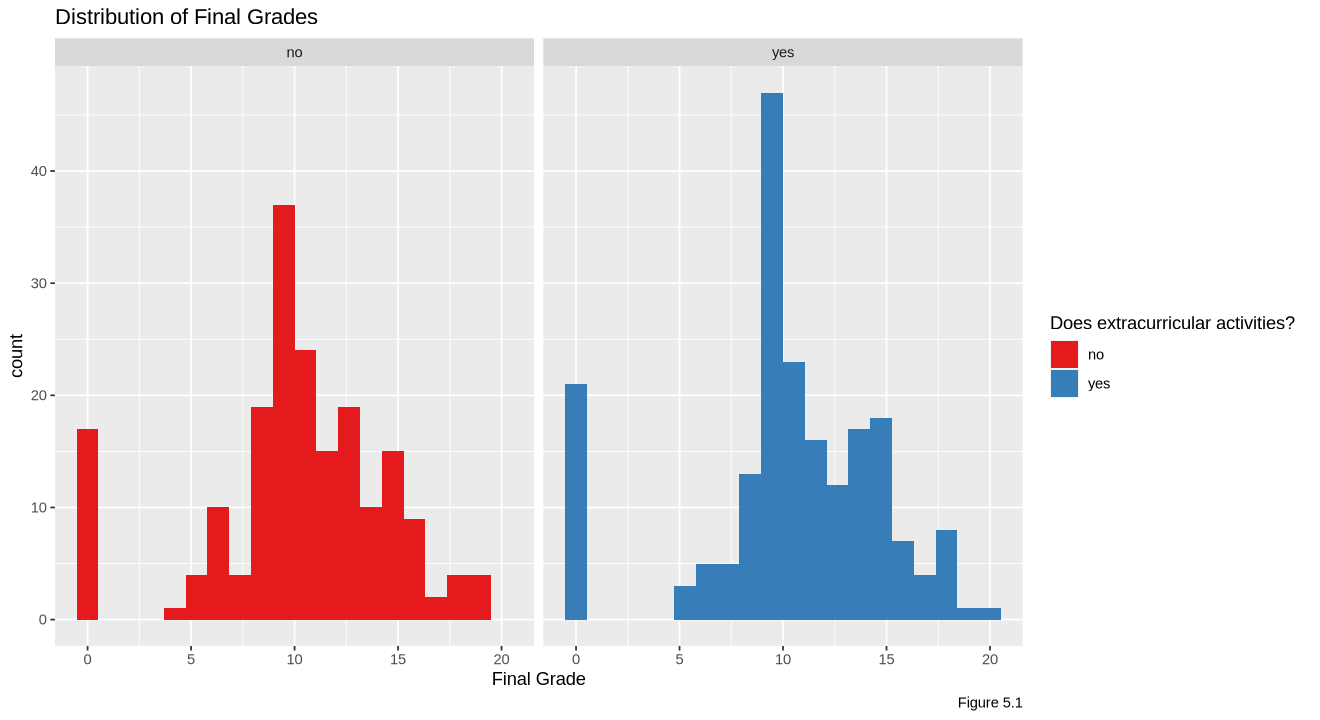

In [8]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
(students_grade_dist <- students_sample %>% 
    ggplot(aes(x = final_grade, fill = activities)) +
    geom_histogram(bins = 20) + 
    facet_wrap(~ activities) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        fill = "Does extracurricular activities?",
        caption = "Figure 5.1")) +
scale_fill_brewer(palette = "Set1")

To further compare the distribution of final grades between the two categories, we generate a box plot. Once again, we observe that they have very similar means.

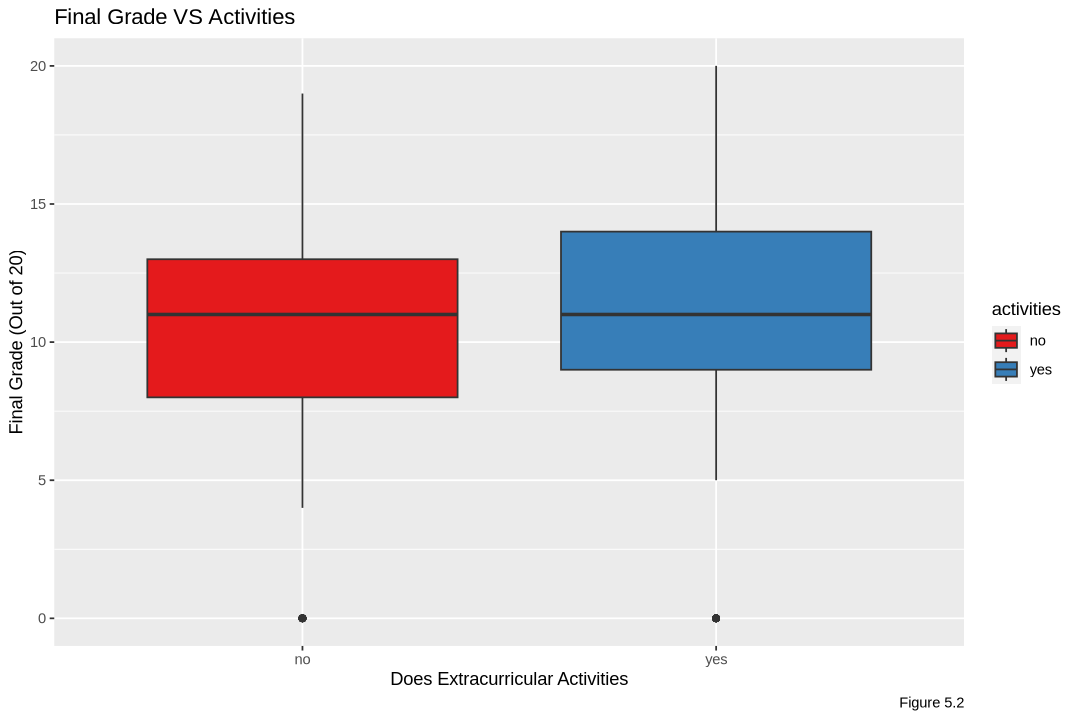

In [9]:
# Create a box plot to compare the distribution of grades between the two categories
options(repr.plot.width = 9, repr.plot.height = 6)
(students_grade_boxplot <- students_sample %>%
    ggplot(aes(x = activities, y = final_grade, fill = activities)) +
    geom_boxplot() + 
    labs(x = "Does Extracurricular Activities",
        y = "Final Grade (Out of 20)", 
        title = "Final Grade VS Activities",
        caption = "Figure 5.2")) +
scale_fill_brewer(palette = "Set1") 

With the boxplots, it becomes more apparent that the **IQR of grades** for students in the `yes` category is higher than that of students in the `no` category (excluding the outliers with a grade of 0).

#### 6. Hypothesis testing via the bootstrapping method

To perform hypothesis testing about the difference in the means, we will first use the bootstrapping method with a **5% significance level**. We will also be applying the `infer` workflow.

Let $\bar{x}_1$ represent the mean grade of students participating in extracurricular activities and $\bar{x}_2$ represent the mean grade of students who do not participate in extracurricular activities. 

Our hypotheses are as follows:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0 $$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

In [16]:
# First, we calculate the observed test statistic
(bootstrap_test_stat <- students_sample %>%
    specify(formula = final_grade ~ activities) %>%
    calculate(stat = "diff in means", order = c("yes", "no")))
print("Table 6.1")

stat
<dbl>
0.147356


[1] "Table 6.1"


In [11]:
# Set the seed for reproducibility
set.seed(1000)

# Then, we generate a null distribution
bootstrap_null_dist <- students_sample %>%
    specify(formula = final_grade ~ activities) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("yes", "no"))

head(bootstrap_null_dist)
print("Table 6.2")

replicate,stat
<int>,<dbl>
1,0.75514182
2,-0.70354413
3,-0.69341437
4,-0.21731548
5,0.29930246
6,0.01566908


[1] "Table 6.2"


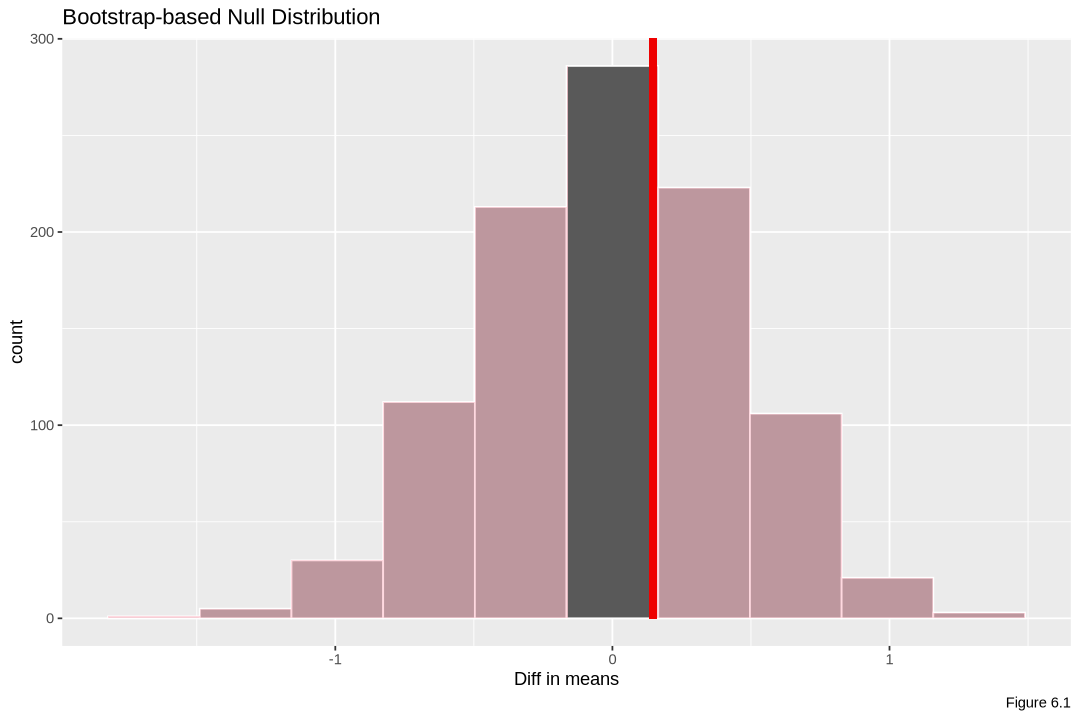

In [17]:
# We now visualize the results of the hypothesis test (i.e. the null distribution and the test statistic)
(bootstrap_dist_plot <- bootstrap_null_dist %>%
    visualize(bins = 10) + 
    shade_p_value(bootstrap_test_stat, direction = "both") +
    labs(x = "Diff in means",
         title = "Bootstrap-based Null Distribution",
        caption = "Figure 6.1"))

In [13]:
# Obtain the p-value
(bootstrap_p_val <- bootstrap_null_dist %>%
    get_p_value(obs_stat = bootstrap_test_stat, direction = "both"))
print("Table 6.3")

p_value
<dbl>
0.742


[1] "Table 6.3"


Given the p-value of 0.742 obtained from the hypothesis test above, we **do not reject** the null hypothesis at the 5% significance level. We can conclude that there is not sufficient statistical evidence suggesting that the means grades of the two groups are different. Given that we did not reject the null hypothesis, we are also at risk of commiting a **Type II error**.

In [14]:
# Find a 95% confidence interval for the difference in mean
(bootstrap_ci <- bootstrap_null_dist %>%
    get_ci(level = 0.95))
print("Table 6.4")

lower_ci,upper_ci
<dbl>,<dbl>
-0.9263989,0.8260502


[1] "Table 6.4"


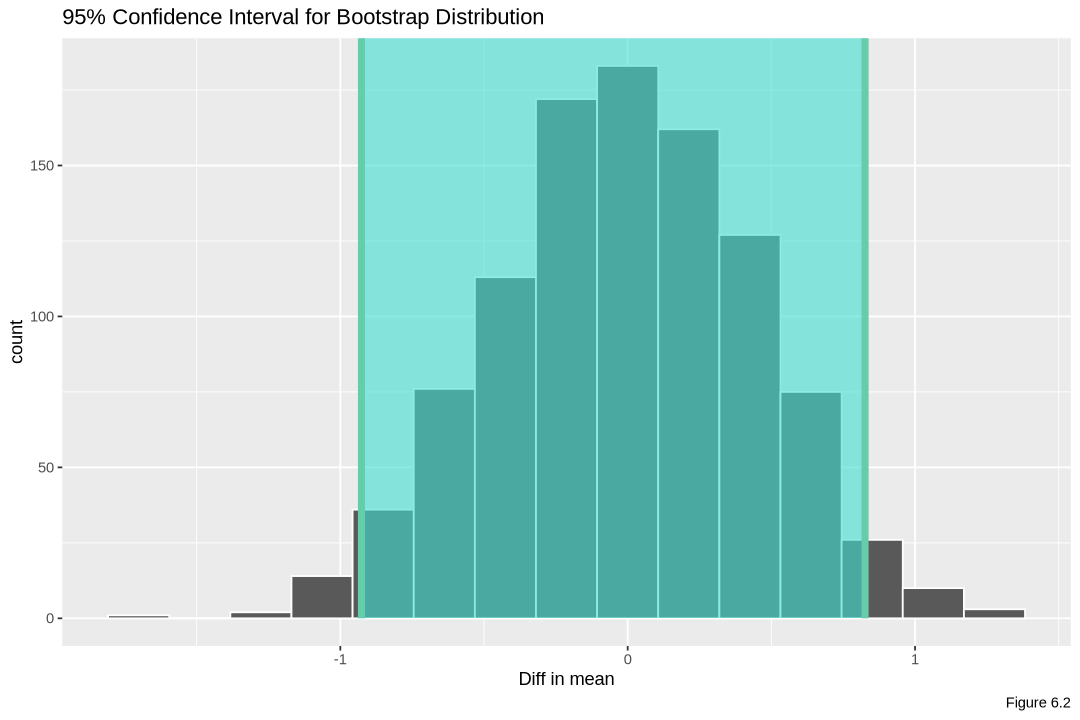

In [19]:
# Visualize the confidence interval
(bootstrap_ci_plot <- bootstrap_null_dist %>%
    visualize() + 
    shade_ci(endpoints = bootstrap_ci) +
    labs(x = "Diff in mean",
         title = "95% Confidence Interval for Bootstrap Distribution",
         caption = "Figure 6.2"))

Based on the results above, we are **95% confident** that the **true difference** in population mean will fall within the $[-0.9263989, 0.8260502]$ interval. Considering that either extremes of the interval's values are both lower than an absolute value of **1 grade point**, the short range demonstrates that the difference between mean grades of the two groups is miniscule. 

#### 7. Hypothesis testing via the asymptotic method

In [ ]:
# Let's visualize the distribution of our data again
students_grade_dist

While the distributions appear somewhat normal (disregarding the spike at 0), we are unsure if the *populations* are normally distributed. When making a student t-test, one of the assumptions made is that the population distributions should be normal. Since we cannot be certain of the population distribution, using the CLT we can still make an assumption that our samples will produce a normal sampling distribution. In order for this assumption to hold validity, our sample size should be **sufficiently large** (at least $n > 30$), which both of them do. 


In [ ]:
# COMMENTED OUT TO REUSE PRELIMINARY RESULTS

# facet.labs <- c("Does not participate in activities", "Participates in activities")
# names(facet.labs) <- c("no", "yes")

# grade_dist_by_group <- students_sample |>
#     ggplot(aes(x = final_grade)) +
#     geom_histogram(bins = 20) +
#     facet_wrap(~activities, labeller = labeller(activities = facet.labs)) +
#     xlab("Final Grade") +
#     ylab("Count")
    

# grade_dist_by_group

We can also print out the data summary again to determine the appropriateness of using the asymptotic method.

In [ ]:
prelim_summary

In [ ]:
# COMMENTED OUT TO REUSE PRELIMINARY RESULTS

# students_summary <-
#     students_sample |>
#     group_by(activities) |>
#     summarise(sample_mean = mean(final_grade),
#               sample_var = sd(final_grade),
#               n = n())

# students_summary

Based on this information, we will conduct a two-sample t-test to test if the difference in sample means are statistically significant. We will use a significance level of 5%. We will not assume equal variances within the populations and couple with our unequal sample size, using a Welch's t-test is most appropriate.

In [18]:
asymp_test <- t.test(final_grade ~ activities, data = students_sample, alternative = "two.sided") |>
              tidy()

asymp_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.147356,10.34021,10.48756,-0.3194428,0.7495605,392.9844,-1.054262,0.7595503,Welch Two Sample t-test,two.sided


The test returns a p-value of **0.7496**, which represents the probability of seeing the observed samples assuming the null hypothesis is correct. Given the p-value is greater than our significance level, we cannot reject the null hypothesis. By doing so, we are at risk of commiting a **Type II error**.

## Discussion

### **TODO**
In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found, and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss future questions/research this study could lead to.

## References
Universidade Portucalense (2022). Portuguese Grading System. University of Porto. https://www.upt.pt/en/home/internationals/portuguese-grading-system-2/

Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Oberle, E., Ji, X. R., Kerai, S., Guhn, M., Schonert‐Reichl, K. A., & Gadermann, A. M. (2020). Screen time and extracurricular activities as risk and protective factors for mental health in adolescence: A population-level study. Preventive Medicine, 141, 106291. https://doi.org/10.1016/j.ypmed.2020.106291 

G.Duncan, C. Dowsett, A. Classens, K. Magnuson, A. Huston, P. Klebanov, L. Pagani, L. Feinstein, M. Engel, J. Brooks-Gunn, H. Sexton, K. Duckworth (2007). School Readiness and Later Achievement: Developmental Psychology, Vol 23 (pg 1428, 1446) DOI: 10.1037/0012-1649.43.6.1428 

N. Wilson (2009). Impact of Extracurricular Activities on Students. https://www2.uwstout.edu/content/lib/thesis/2009/2009wilsonn.pdf 
